In [25]:
import pandas as pd
df_wine = pd.read_csv(

    'https://archive.ics.uci.edu/ml/'

    'machine-learning-databases/wine/wine.data',

    header=None

)


In [26]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [27]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize the features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [30]:
pca = PCA(n_components=2)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, solver='lbfgs',multi_class='ovr') 

In [32]:
X_train_pca = pca.fit_transform(X_train_std)

X_test_pca = pca.transform(X_test_std)

In [33]:
lr.fit(X_train_pca, y_train)

/Users/snehil/.dev_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=1)

In [34]:
y_pred = lr.predict(X_test_pca)

In [35]:
y_pred

array([1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 1, 3, 1, 1, 3,
       2, 2, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1, 3, 3, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 2, 2, 1, 2])

In [36]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 4


#### extras

##### If we are interested in the explained variance ratios of the different principal components, we can simply initialize the PCA class with the n_components parameter set to None, so all principal components are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_ attribute

In [38]:
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

#### Assessing feature contributions

In [43]:
import numpy as np
import matplotlib.pyplot as plt
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

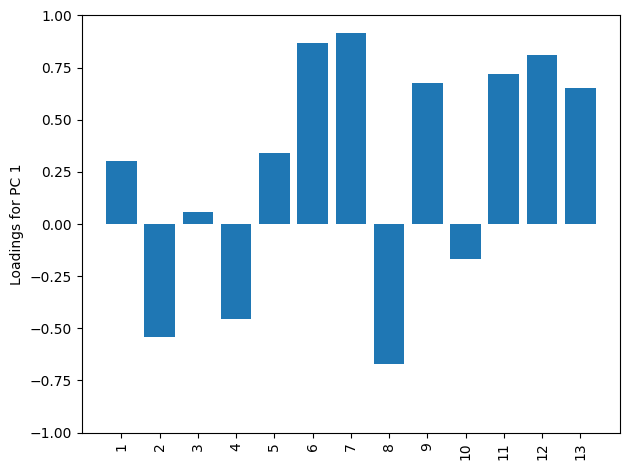

In [44]:
fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')

ax.set_ylabel('Loadings for PC 1')

ax.set_xticks(range(13))

ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])

plt.tight_layout()

plt.show()
